# **📁 Step 1: Import Libraries**

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import string

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download required NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')

# Define NLP tools
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# **📥 Step 2: Load Data**

In [2]:
twitter_df = pd.read_csv("Twitter_Data.csv")
reddit_df = pd.read_csv("Reddit_Data.csv")


# **👁️ Step 3: Exploratory Data Analysis (EDA)**

Twitter Data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162980 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162976 non-null  object 
 1   category    162973 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.5+ MB
None                                           clean_text  category
0  when modi promised “minimum government maximum...      -1.0
1  talk all the nonsense and continue all the dra...       0.0
2  what did just say vote for modi  welcome bjp t...       1.0
3  asking his supporters prefix chowkidar their n...       1.0
4  answer who among these the most powerful world...       1.0

Reddit Data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37249 entries, 0 to 37248
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   clean_comment  37149 non-null  object
 1   category       3724

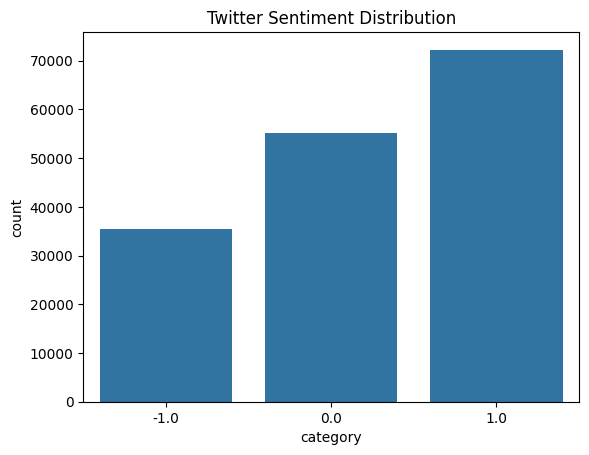

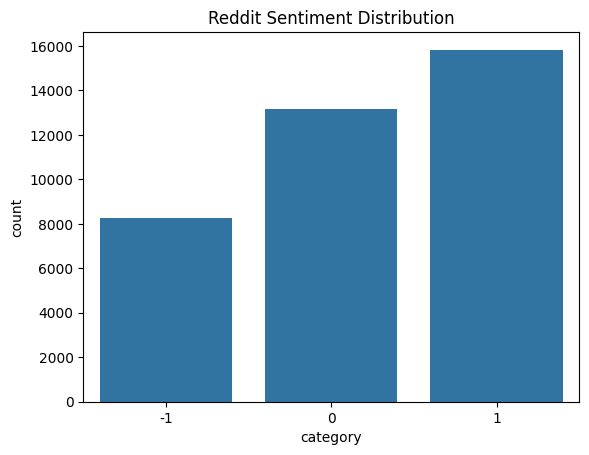

In [3]:
# Basic overview
print("Twitter Data")
print(twitter_df.info(), twitter_df.head())

print("\nReddit Data")
print(reddit_df.info(), reddit_df.head())

# Class distributions
sns.countplot(data=twitter_df, x='category').set_title("Twitter Sentiment Distribution")
plt.show()

sns.countplot(data=reddit_df, x='category').set_title("Reddit Sentiment Distribution")
plt.show()


# **🧹 Step 4: Preprocessing**

In [6]:
# Fix if column got overwritten or skipped
twitter_df['clean_text'] = twitter_df['clean_text'].fillna('').astype(str)
reddit_df['clean_comment'] = reddit_df['clean_comment'].fillna('').astype(str)

# Cleaning function (safe and correct)
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)
    text = re.sub(r'@\w+|\#','', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    text = text.strip()

    tokens = text.split()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return " ".join(tokens)

# Apply cleaning again
twitter_df['clean_text'] = twitter_df['clean_text'].apply(clean_text)
reddit_df['clean_comment'] = reddit_df['clean_comment'].apply(clean_text)


# **🧪 Step 5: Feature Extraction using TF-IDF**

In [9]:
# Drop missing labels and convert
twitter_df = twitter_df.dropna(subset=['category'])
twitter_df['category'] = twitter_df['category'].astype(int)

# TF-IDF
tfidf = TfidfVectorizer(max_features=5000)

X_twitter = tfidf.fit_transform(twitter_df['clean_text']).toarray()
X_reddit = tfidf.transform(reddit_df['clean_comment']).toarray()

y_twitter = twitter_df['category']
y_reddit = reddit_df['category'].astype(int)


/tmp/ipython-input-9-1110587818.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twitter_df['category'] = twitter_df['category'].astype(int)


# **🧩 Step 6: Train/Test Split on Twitter Data**

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_twitter, y_twitter, test_size=0.2, random_state=42, stratify=y_twitter
)


# **🤖 Step 7: Train the Model**

In [11]:
from sklearn.linear_model import LogisticRegression

# Initialize and train model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

# **📊 Step 8: Evaluate on Twitter Test Set**

Accuracy Score: 0.8806872219665592

Classification Report:
               precision    recall  f1-score   support

          -1       0.86      0.76      0.81      7102
           0       0.85      0.96      0.90     11043
           1       0.92      0.88      0.90     14450

    accuracy                           0.88     32595
   macro avg       0.88      0.87      0.87     32595
weighted avg       0.88      0.88      0.88     32595



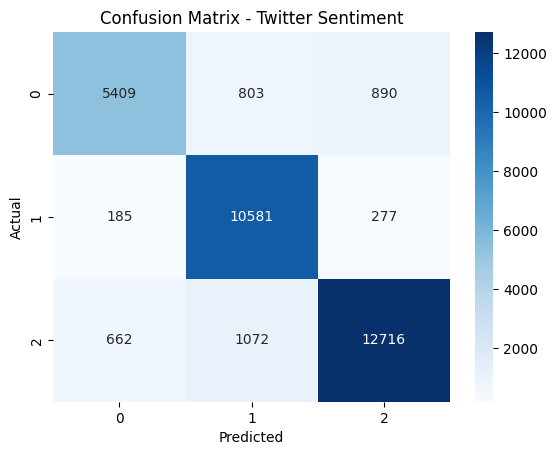

In [12]:
# Predict on test data
y_pred = model.predict(X_test)

# Metrics
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Twitter Sentiment")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# **📈 Step 9: Predict Sentiment on Reddit Comments**

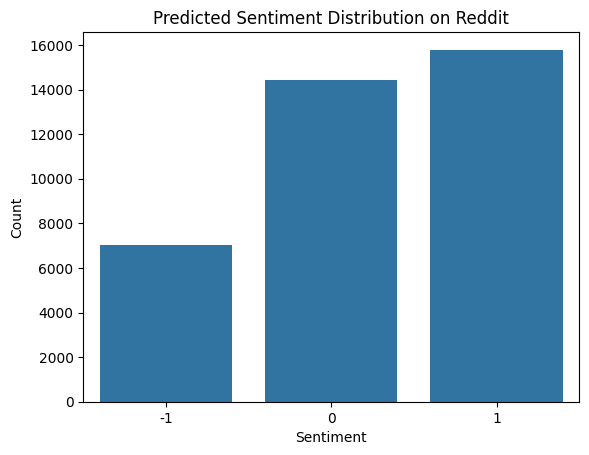

In [13]:
# Predict on Reddit
reddit_predictions = model.predict(X_reddit)

# Save predictions to DataFrame
reddit_df['predicted_sentiment'] = reddit_predictions

# Visualize predictions
sns.countplot(x=reddit_predictions)
plt.title("Predicted Sentiment Distribution on Reddit")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()


# **💾 Step 10: Save Model and Vectorizer**

In [14]:
import joblib

joblib.dump(model, "sentiment_model.pkl")
joblib.dump(tfidf, "tfidf_vectorizer.pkl")


['tfidf_vectorizer.pkl']